# Importing libraries and dataset

In [2]:
# This is a Python 3 environment 
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Importing libraries for
import numpy as np # linear algebra
import pandas as pd # data processing
import os # files
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
from sklearn.ensemble import RandomForestClassifier # machine learning

## PyCaret

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.
For more, go to...
https://pycaret.org



In [2]:
# Installing and importing PyCaret, which will be demonstrated in this notebook
!pip install pycaret
from pycaret.classification import *

     |████████████████████████████████| 252 kB 404 kB/s eta 0:00:01
     |████████████████████████████████| 96 kB 1.7 MB/s eta 0:00:011
     |████████████████████████████████| 13.9 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 258 kB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 16.1 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 53 kB 1.2 MB/s  eta 0:00:01
     |████████████████████████████████| 6.0 MB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 326 kB 22.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 23.4 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 84 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 121 kB 29.4 MB/s eta 0:00:01
     |████████████████████████████████| 

In [3]:
# Importing the files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


## Data Dictionary
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
# Loading the training dataset
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Loading the testing dataset
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
# Training data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Null values count in each column
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Description of dataset
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Description of dataset including non-numeric values
train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Collander, Mr. Erik Gustaf",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Data Exploration

## Survival

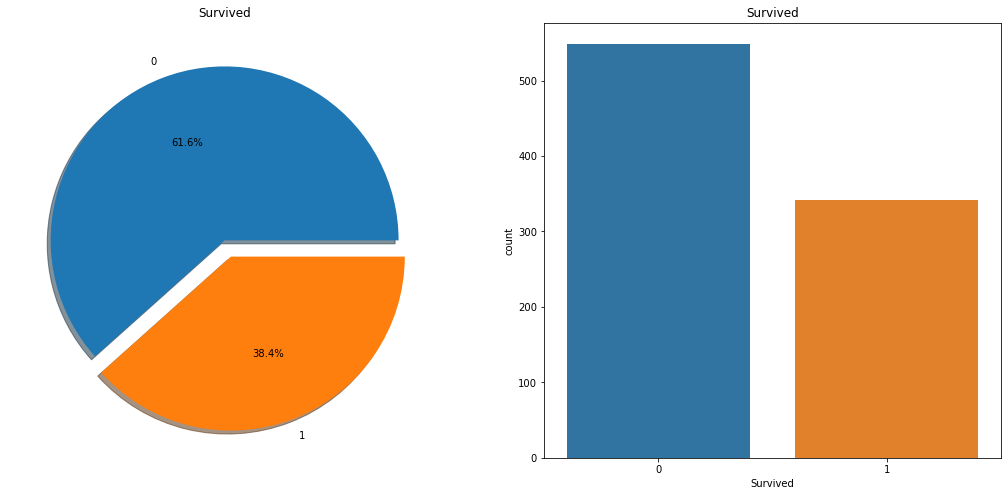

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Women who survived

In [11]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("Women survival: ", round(rate_women*100, 2), "%")

Women survival:  74.2 %


## Men who survived

In [12]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("Men survivial: ", round(rate_men*100, 2), "%")

Men survivial:  18.89 %


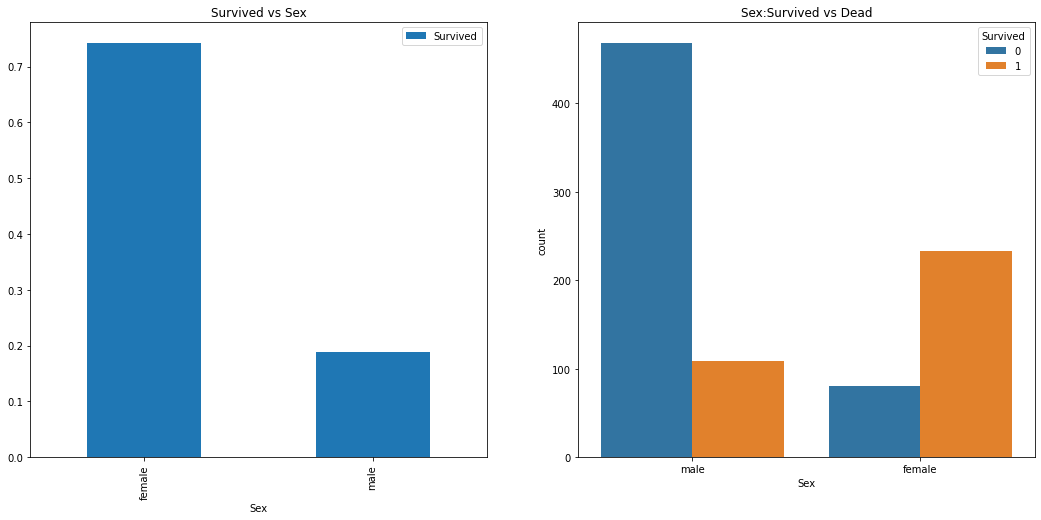

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## Correlation

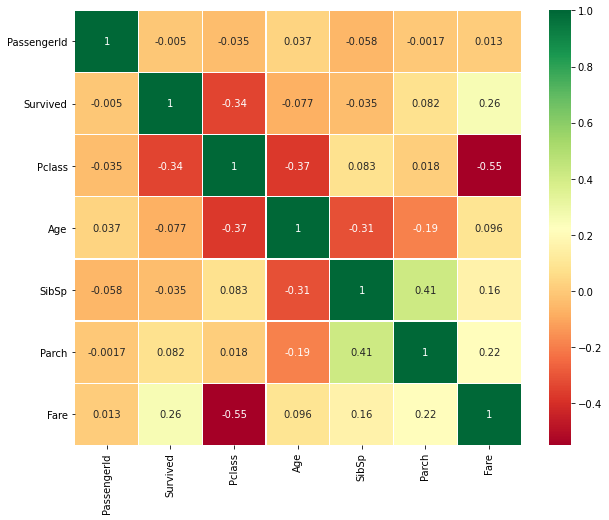

In [14]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Data Preprocessing

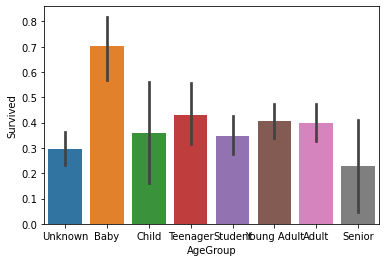

In [15]:
# Sorting the ages into logical categories
train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels = labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)

# Bar plot
sns.barplot(x="AgeGroup", y="Survived", data=train_data)
plt.show()

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


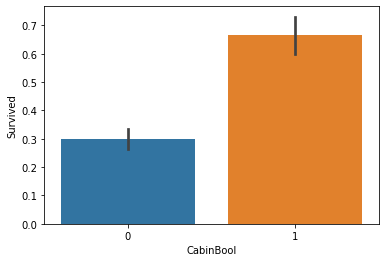

In [16]:
# CabinBool
train_data["CabinBool"] = (train_data["Cabin"].notnull().astype('int'))
test_data["CabinBool"] = (test_data["Cabin"].notnull().astype('int'))

print("Percentage of CabinBool = 1 who survived:", train_data["Survived"][train_data["CabinBool"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of CabinBool = 0 who survived:", train_data["Survived"][train_data["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

# CabinBool vs. Survival
sns.barplot(x="CabinBool", y="Survived", data=train_data)
plt.show()

In [17]:
# For filling in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train_data[train_data["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train_data[train_data["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train_data[train_data["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [18]:
# Replacing the missing values in the Embarked feature with S(with mode)
train_data = train_data.fillna({"Embarked": "S"})

In [19]:
# Create a combined group of both datasets
combine = [train_data, test_data]

# Extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
# Replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [21]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,1


In [22]:
# Fill missing age with mode age group for each title
mr_age = train_data[train_data["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train_data[train_data["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train_data[train_data["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train_data[train_data["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train_data[train_data["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train_data[train_data["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train_data["AgeGroup"])):
    if train_data["AgeGroup"][x] == "Unknown":
        train_data["AgeGroup"][x] = age_title_mapping[train_data["Title"][x]]
        
for x in range(len(test_data["AgeGroup"])):
    if test_data["AgeGroup"][x] == "Unknown":
        test_data["AgeGroup"][x] = age_title_mapping[test_data["Title"][x]]

In [23]:
# Map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping)
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5.0,0,1


In [24]:
# Remaining null values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeGroup         0
CabinBool        0
Title            0
dtype: int64


In [25]:
# Dropping the Cabin feature since not a lot more useful information can be extracted from it
train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

In [1]:
# Convering Embarked to numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)
train_data.head()

NameError: name 'train_data' is not defined

In [27]:
print(train_data.info())
print('-'*25)
print("Null Values:")
print(train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  AgeGroup     891 non-null    float64
 12  CabinBool    891 non-null    int64  
 13  Title        891 non-null    int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 97.6+ KB
None
-------------------------
Null Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp         

# Modeling and Training

## Basic RandomForest Classifier

In [28]:
y = train_data["Survived"]

# Features to be taken into account for training
features = ["Pclass", "Sex", "SibSp", "Parch", "AgeGroup"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# Training
model.fit(X, y)
# Predicting using the test dataset
predictions = model.predict(X_test)

In [29]:
# Saving the submission with PassengerId, and Survival prediction
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('random_forest_submission.csv', index=False)
print("Submission file was successfully saved!")

Submission file was successfully saved!


# Now using PyCaret to visualize and train with various models

### Data Setup

In [30]:
clf1 = setup(train_data, target = 'Survived', ignore_features = ['Ticket', 'Name', 'PassengerId'], silent = True, session_id = 786) 

Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(891, 14)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [31]:
# Different models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


### Comparing different models

In [32]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8332,0.8652,0.7404,0.8095,0.7695,0.6398,0.6451,0.0489
1,Gradient Boosting Classifier,0.8331,0.8826,0.7152,0.8245,0.7641,0.6365,0.6417,0.1460
2,CatBoost Classifier,0.8220,0.8758,0.7069,0.8065,0.7506,0.6137,0.6192,1.4600
3,Ridge Classifier,0.8171,0.0000,0.7402,0.7748,0.7544,0.6091,0.6122,0.0097
4,Light Gradient Boosting Machine,0.8155,0.8666,0.7150,0.7838,0.7456,0.6017,0.6054,0.0474
5,Linear Discriminant Analysis,0.8138,0.8627,0.7319,0.7730,0.7494,0.6018,0.6048,0.0090
6,Random Forest Classifier,0.8074,0.8568,0.7111,0.7718,0.7376,0.5862,0.5898,0.1146
7,Extreme Gradient Boosting,0.8058,0.8642,0.7071,0.7700,0.7341,0.5821,0.5864,0.1510
8,Ada Boost Classifier,0.7945,0.8511,0.7277,0.7380,0.7303,0.5647,0.5675,0.1270
9,Decision Tree Classifier,0.7883,0.7768,0.7027,0.7360,0.7165,0.5481,0.5511,0.0061


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Using Logistic Regression

In [33]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8333,0.7500,0.7500,0.7500,0.5962,0.5962
1,0.8730,0.9038,0.7500,0.9000,0.8182,0.7219,0.7289
2,0.7619,0.8333,0.5833,0.7368,0.6512,0.4741,0.4816
3,0.7742,0.7904,0.6957,0.6957,0.6957,0.5162,0.5162
4,0.8387,0.8914,0.7083,0.8500,0.7727,0.6493,0.6558
5,0.8710,0.9254,0.8750,0.8077,0.8400,0.7322,0.7338
6,0.8226,0.8114,0.6250,0.8824,0.7317,0.6049,0.6249
7,0.9032,0.9452,0.9167,0.8462,0.8800,0.7991,0.8009
8,0.8065,0.8240,0.6667,0.8000,0.7273,0.5792,0.5850
9,0.8871,0.9112,0.8333,0.8696,0.8511,0.7602,0.7607


### Tuning model

In [34]:
tuned_lr = tune_model(lr, optimize = 'AUC', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8333,0.7083,0.7083,0.7083,0.5288,0.5288
1,0.8571,0.9103,0.7083,0.8947,0.7907,0.6845,0.6952
2,0.7619,0.8451,0.5833,0.7368,0.6512,0.4741,0.4816
3,0.7903,0.7904,0.6957,0.7273,0.7111,0.5467,0.5470
4,0.8387,0.9002,0.7500,0.8182,0.7826,0.6548,0.6564
5,0.8710,0.9243,0.9167,0.7857,0.8462,0.7362,0.7427
6,0.8226,0.7993,0.6250,0.8824,0.7317,0.6049,0.6249
7,0.8710,0.9419,0.8333,0.8333,0.8333,0.7281,0.7281
8,0.8226,0.8240,0.6667,0.8421,0.7442,0.6112,0.6209
9,0.8548,0.9090,0.7917,0.8261,0.8085,0.6917,0.6921


### Area Under the Curve

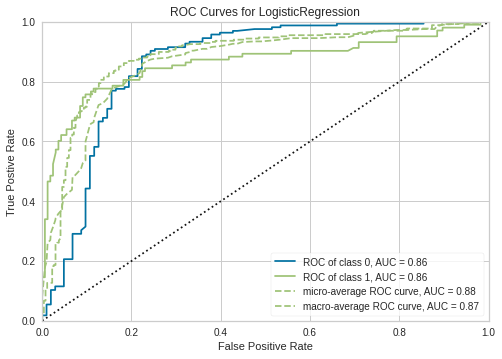

In [35]:
plot_model(tuned_lr)

### Confusion Matrix

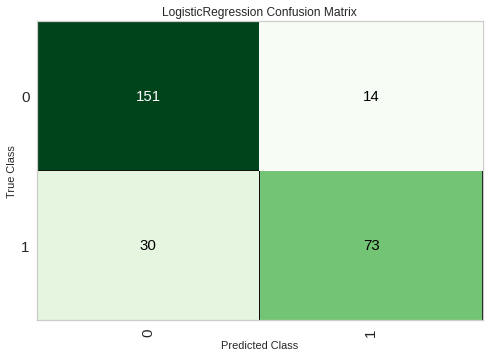

In [36]:
plot_model(tuned_lr, plot ="confusion_matrix")

### Threshold

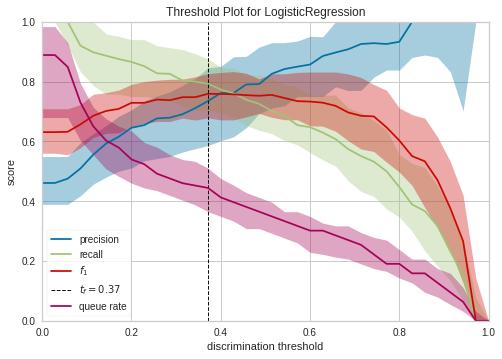

In [37]:
plot_model(tuned_lr, plot ="threshold")

### Preicision - Recall Curve

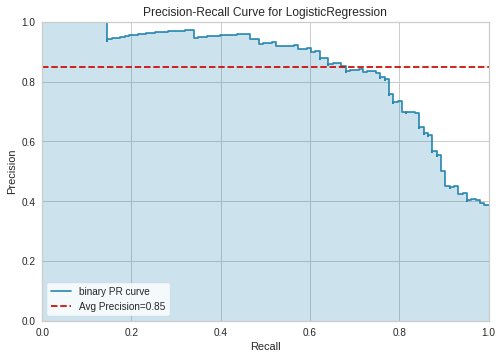

In [38]:
plot_model(tuned_lr, plot ="pr")

### Class Prediction Error

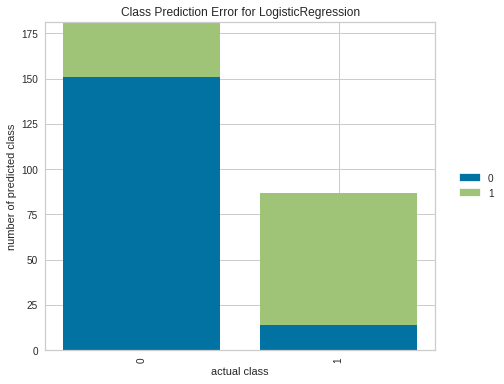

In [39]:
plot_model(tuned_lr, plot ="error")

### Recursive Feature Selection

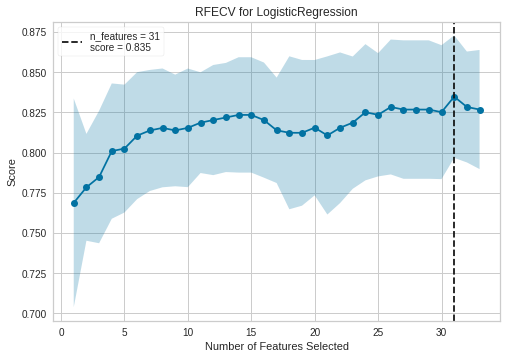

In [40]:
plot_model(tuned_lr, plot ="rfe")

### Learning Curve

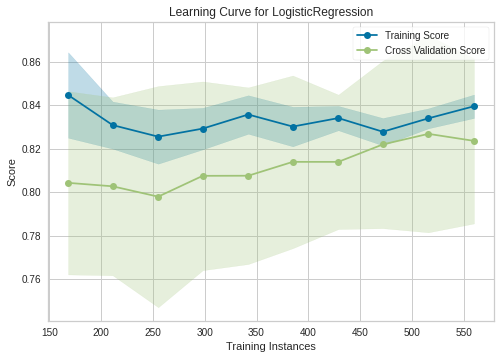

In [41]:
plot_model(tuned_lr, plot ="learning")

### Validation Curve

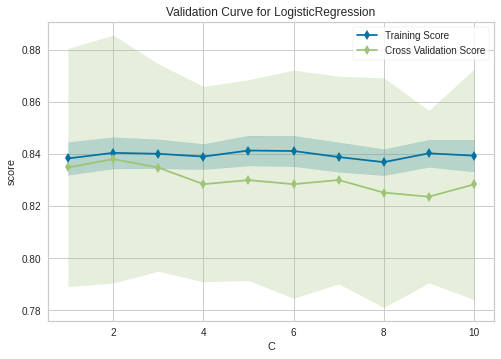

In [42]:
plot_model(tuned_lr, plot ="vc")

### Feature Importance

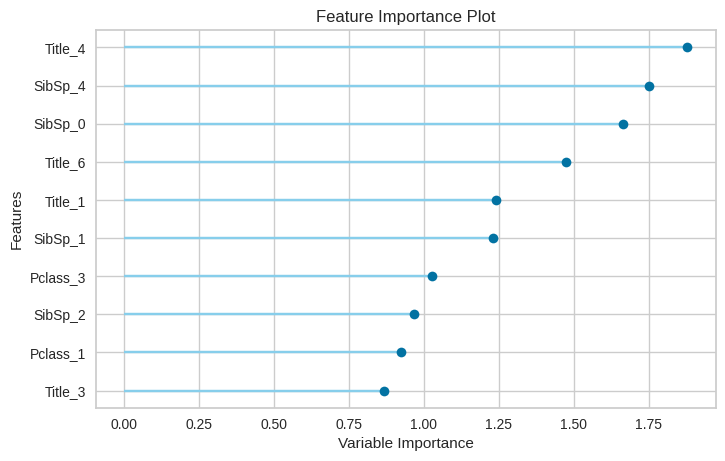

In [43]:
plot_model(tuned_lr, plot ="feature")

### Decision Boundary

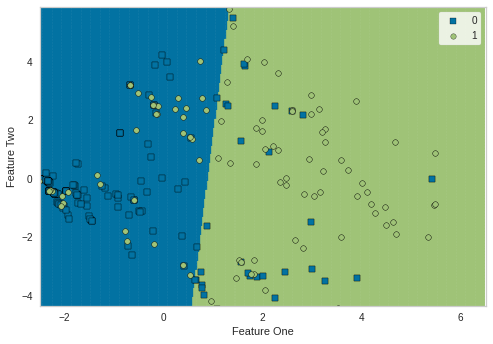

In [44]:
plot_model(tuned_lr, plot ="boundary")

### Making predicton on test data

In [45]:
predictions = predict_model(tuned_lr, data = test_data)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,CabinBool,Title,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,3,5.0,0,1,0,0.1402
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,1,6.0,0,3,1,0.5648
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,3,7.0,0,1,0,0.2297
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,1,5.0,0,1,0,0.0673
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,1,4.0,0,3,1,0.6434


### Saving the submission

In [46]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions.Label})
output.to_csv('lr_submission.csv', index=False)
print("Submission file was successfully saved!")
output.head()

Submission file was successfully saved!


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Now using CatBoost Classifier

In [47]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.8365,0.7083,0.6800,0.6939,0.4992,0.4995
1,0.8095,0.8846,0.7083,0.7727,0.7391,0.5896,0.5910
2,0.7619,0.8312,0.5417,0.7647,0.6341,0.4652,0.4804
3,0.7903,0.8272,0.6522,0.7500,0.6977,0.5384,0.5415
4,0.8226,0.8925,0.6250,0.8824,0.7317,0.6049,0.6249
5,0.8871,0.9342,0.8750,0.8400,0.8571,0.7639,0.7643
6,0.7742,0.7862,0.6250,0.7500,0.6818,0.5090,0.5141
7,0.9194,0.9726,0.8333,0.9524,0.8889,0.8260,0.8306
8,0.8226,0.8525,0.7083,0.8095,0.7556,0.6173,0.6207
9,0.8710,0.9408,0.7917,0.8636,0.8261,0.7238,0.7256


In [48]:
tuned_catboost = tune_model(catboost, optimize = 'AUC', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8344,0.7500,0.7200,0.7347,0.5660,0.5663
1,0.7937,0.8568,0.6667,0.7619,0.7111,0.5517,0.5547
2,0.7460,0.8146,0.5833,0.7000,0.6364,0.4437,0.4481
3,0.8065,0.8378,0.6957,0.7619,0.7273,0.5778,0.5792
4,0.7581,0.8914,0.5833,0.7368,0.6512,0.4698,0.4773
5,0.8710,0.9474,0.8750,0.8077,0.8400,0.7322,0.7338
6,0.7903,0.7961,0.6667,0.7619,0.7111,0.5477,0.5507
7,0.8387,0.9408,0.7917,0.7917,0.7917,0.6601,0.6601
8,0.8226,0.8810,0.7083,0.8095,0.7556,0.6173,0.6207
9,0.8548,0.9518,0.7917,0.8261,0.8085,0.6917,0.6921


### Interpretations are implemented based on the SHAP (SHapley Additive exPlanations) 

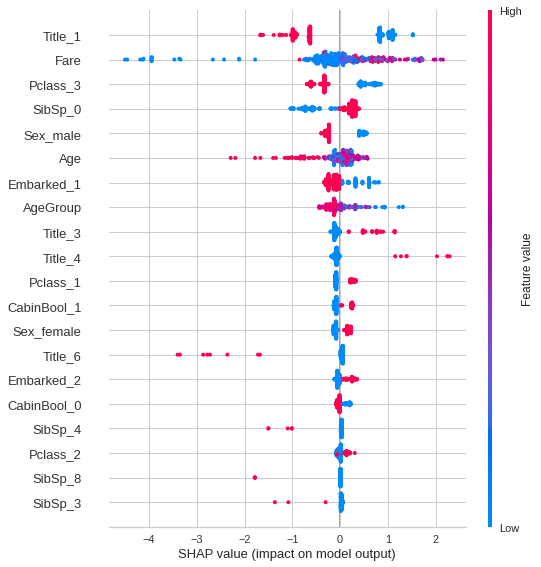

In [49]:

interpret_model(tuned_catboost)

### Correlation Plot

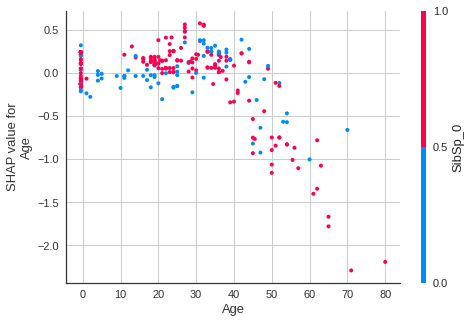

In [50]:
interpret_model(tuned_catboost, plot="correlation")

### Reason Plot at Observation Level


In [51]:
interpret_model(tuned_catboost, plot = 'reason', observation = 10)

### Making prediction on test data

In [52]:
predictions = predict_model(tuned_catboost, data = test_data)

In [53]:
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,CabinBool,Title,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,3,5.0,0,1,0,0.0607
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,1,6.0,0,3,0,0.0280
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,3,7.0,0,1,0,0.1564
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,1,5.0,0,1,0,0.1387
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,1,4.0,0,3,0,0.4088


In [54]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions.Label})
output.to_csv('catboost_submission.csv', index=False)
print("Submission file was successfully saved!")

Submission file was successfully saved!
